# Correlation - Unit 02 - Analysis

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Calculate and interpret Pearson and Spearman Correlation levels in numerical variables



---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Packages for Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Correlation Tests

We will study two correlation tests in this unit, they are:
* Pearson
* Spearman

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Pearson


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> Pearson’s correlation (or r coefficient) measures the linear relationship between two numerical variables. 
* That means, this test has the assumption that both variables **change at a constant rate**


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> In the image below we see relationship differences among each plot. There are examples where the linear relationship, either positive or negative, is strong, and examples where the linear relationship is null.
* Note the plot on the bottom right, where the relationship is quadratic. Even though we know there is a quadratic relationship, a Pearson correlation test outputs the correlation as zero.



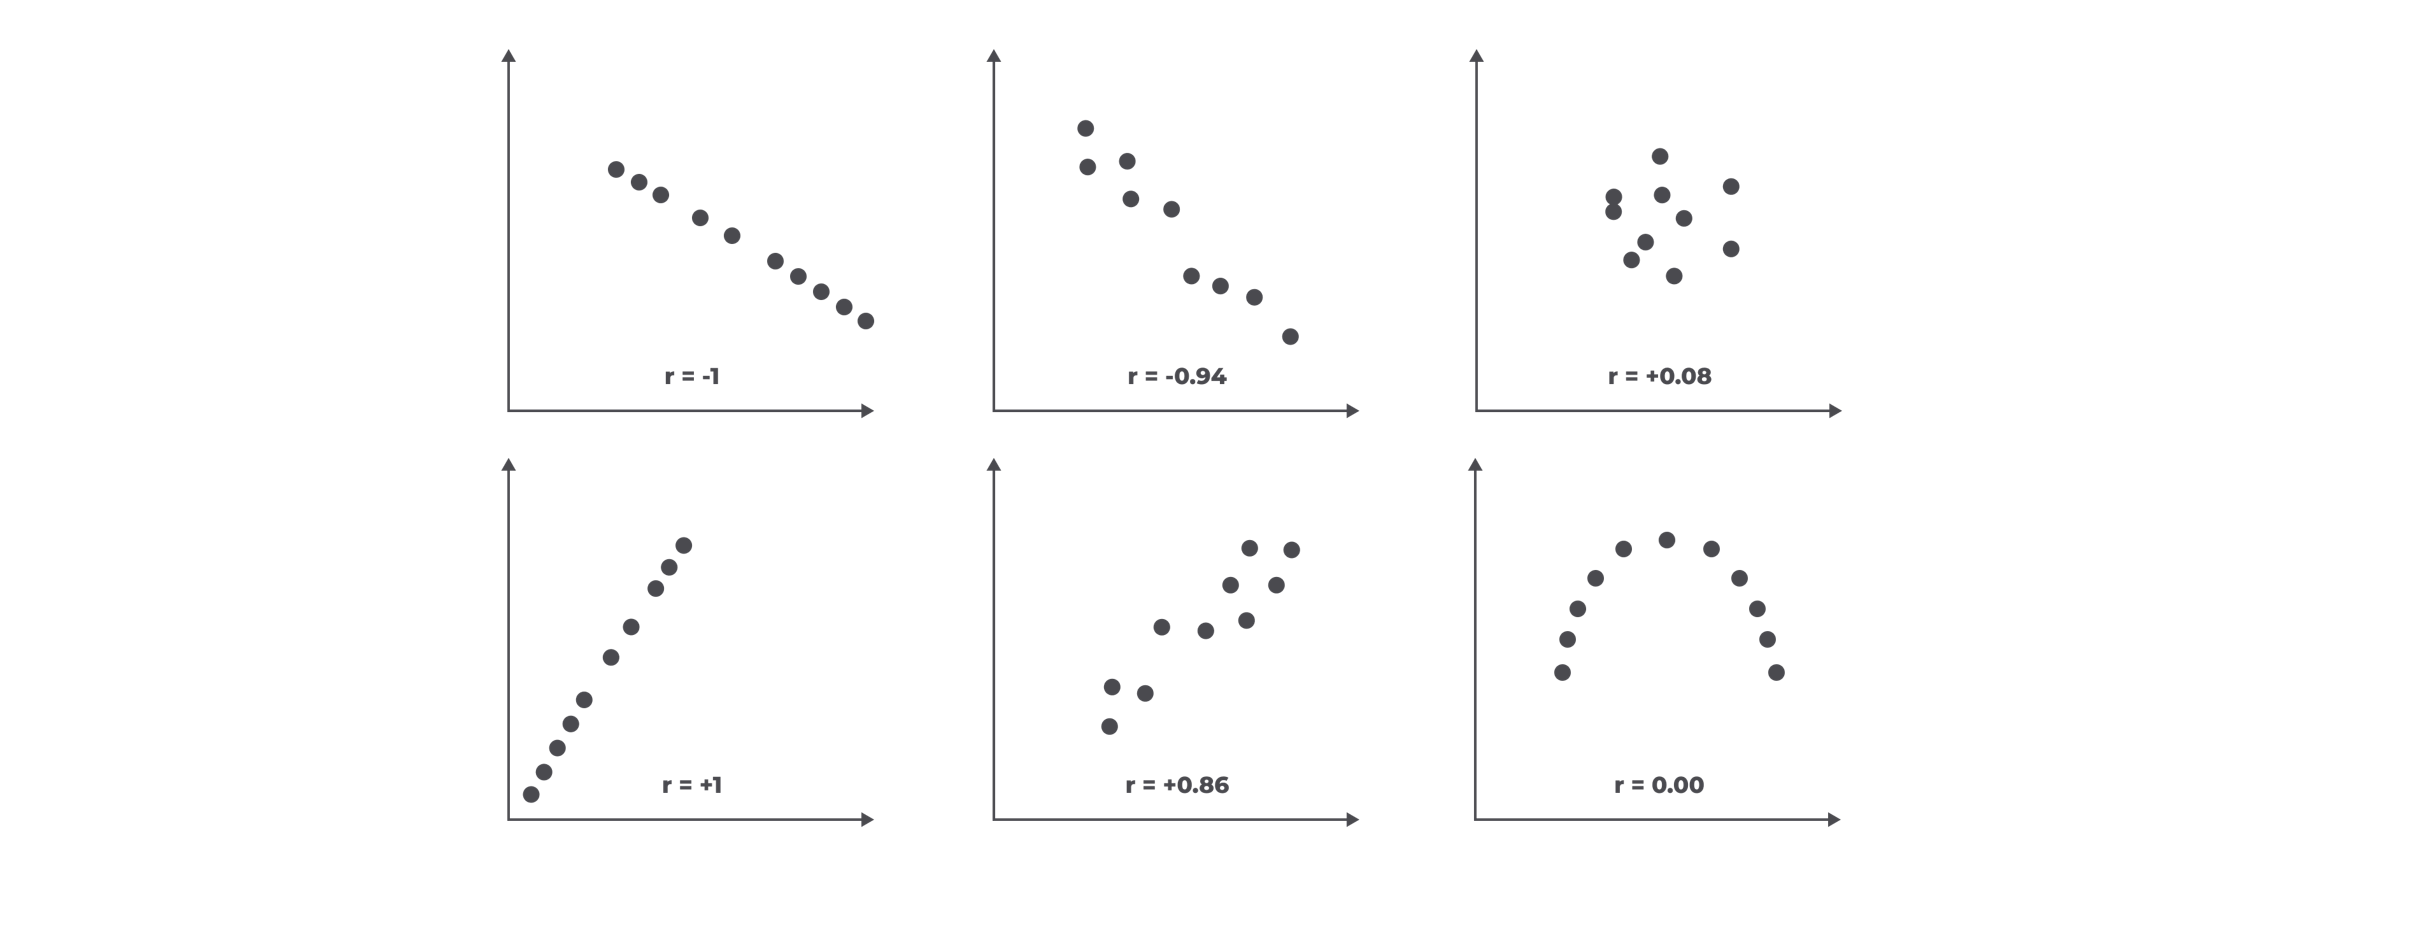

---

Let's consider the mpg dataset from Seaborn. It holds records for mpg (miles per gallon), cylinders, horsepower, and weight from multiple car types.

df = sns.load_dataset('mpg')
df = df.head(50)
print(df.shape)
df.head()

We use [.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) from Pandas library. The argument is `method='pearson'`.


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> Reminder: it considers numerical variables only. The output is a table, where the columns and rows are the numerical variables. The numbers reflect the correlation from a given variable to another.


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Note:
* The correlation between `mpg` and `mpg` is 1. As we may expect, they have the same information and naturally they correlate perfectly. Note also that all diagonal cells where both variables are the same, hold the value 1, for the same reason we stated before.
*The values are symmetric: the correlation between `mpg` and `cylinders` is the same as the correlation between `cylinders` and `mpg`, in this case, -0.9212 (negative and strong correlation). That means, in practical terms, the upper part of the diagonal is repeated.

df_corr = df.corr(method='pearson')
df_corr

---

You may process the table for better clarity, for example, in this dataset, the target variable is mpg, so you filter mpg, using `.filter()`, and sort values by their absolute value, using `.sort_values(key=abs)`


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Note that there are 4 numerical variables (`weight, displacement, horsepower, cylinders`) that are negative and strongly correlated to your target variable! That is an insight since you now have criteria to start visualizing your data based on these variables first.



df_corr.filter(['mpg']).sort_values(by='mpg', key=abs, ascending=False)

Alternatively, we can better understand the correlation using a heatmap from Seaborn.
* Note the data for the heatmap should be in the format where the columns and indices have the same information and each cell correspond to a level between 2 variables.
* We will mask the upper part of the diagonal, we do that with the first 2 lines of code.
* We then plot a heatmap with `sns.heatmap()`. Few additional arguments are set here: `annot=True` means we want to display the value in each square, `mask=mask` hides the upper diagonal values, `annot_kws={"size": 8}` sets the font size for the annotation, and `linewidths=0.5` adds a line between the squares, giving a better sense of separation

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, axes = plt.subplots(figsize=(8,8))
sns.heatmap(data=df_corr, annot=True, mask=mask, cmap='viridis', annot_kws={"size": 8}, linewidths=0.5)
plt.ylim(df_corr.shape[1], 0) # it sets the y axis limits
plt.show()

We now will create a function to plot only correlation levels greater than a certain threshold since it is more interesting to visualize the most correlated variables.
* We will build on top of the previous code to create a function. We set 4 arguments, `data`, `threshold`, `figsize`with a default value, and `annot_size` with a default value for font annotation size

def heatmap_corr(data, threshold, figsize=(8,8), annot_size=8):
  # we create the mask for the upper diagonal and
  # show only values greater than the threshold
  mask = np.zeros_like(data, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  mask[abs(data) < threshold] = True

  # we plot the heatmap as usual
  fig, axes = plt.subplots(figsize=(5,5))
  sns.heatmap(data=data, annot=True, xticklabels=True, yticklabels=True,
              mask=mask, cmap='viridis', annot_kws={"size": annot_size}, ax=axes,
              linewidth=0.5
                    )
  plt.ylim(len(data.columns),0)
  plt.show()

Now we are interested in showing linear relationships that are at least moderate, which means a threshold of 0.4
* We notice many variables are correlating among themselves with strong levels of correlation. Then we can increase the threshold to scope down to fewer variables.



<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> But what if the correlation levels in general were not so high?
* Then you would decrease the threshold level. In this exercise, we will soon set the level to 0.8 (very strong) since this may be a good threshold for an initial analysis.
* But if your data shows the majority of correlation levels to be around, say, 0.4; this value will be the threshold to start your investigation.

heatmap_corr(data= df_corr, threshold=0.4)

Now we are interested to see only very strong correlations, that means a threshold of 0.8
* We notice that mpg is linearly correlated with weight and displacement, a bit more with weight. 
* We notice multicollinearity here since weight and displacement are correlated with each other: 0.93. That means both have the same information to predict the target.

heatmap_corr(data= df_corr, threshold=0.8)

Let's plot a scatterplot of `mpg` against `weight` and `displacement`
* We note that the relationship in both cases is not purely linear, it is kind of exponential. At the same time, there is a clear pattern between the studied variables and the target.
* This is an example of how the correlation study can help you to figure out patterns in a dataset.
  * The data we exercised is a simple dataset, but you can extend the rationale for other datasets.

for col in ['weight', 'displacement']:
  sns.scatterplot(data=df,  x=col, y='mpg')
  plt.show()
  print("\n")

We also plot 'weight' against 'displacement' to check the feature multicollinearity. They show 0.93 for linear correlation, and indeed, they have a linear pattern

 sns.scatterplot(data=df,  x='weight', y='displacement')
 plt.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE:** can you programmatically, in one cell, develop a logic where you will:
* calculate the correlation level, filter the variables where they are correlated with the target at a threshold of 0.7 and do a scatter plot for all of them, separately, against the target.
* Your code should subset `['cylinders', 'displacement', 'horsepower', 'weight']` as the variables that correlate to 0.7 (either positive or negative) to 'mpg'.


# create a variable called var_list, that will calculate the linear correlation,
# filter mpg column and query values greater than 0.7 and lower than -0.7,
# then you get the index
var_list = df.corr()['mpg']
print(var_list)
filtered_indices = var_list[(var_list > 0.7) | (var_list < -0.7)].index
print(filtered_indices)

# next you will loop on each variable and do a scatter plot on mpg against the variable
for col in filtered_indices:
    plt.scatter(df[col], df['mpg'], alpha=0.5)
    plt.title(f'Scatter Plot of {col} vs. mpg')
    plt.xlabel(col)
    plt.ylabel('mpg')
    plt.show()

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> However, there is still another limitation, Pearson correlation assumes your data is normally distributed, which doesn't happen the majority of the time in real datasets
* You can use other methods, like Spearman to figure out correlations and complement your data analysis

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Spearman

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> Spearman correlation measures the monotonic relationship between two variables
* That means the variables do not necessarily have to move at a constant rate.
* It helps to reveal a general trend, that is: if one variable increases, so does the other one. Or if one increases, the other one decreases.

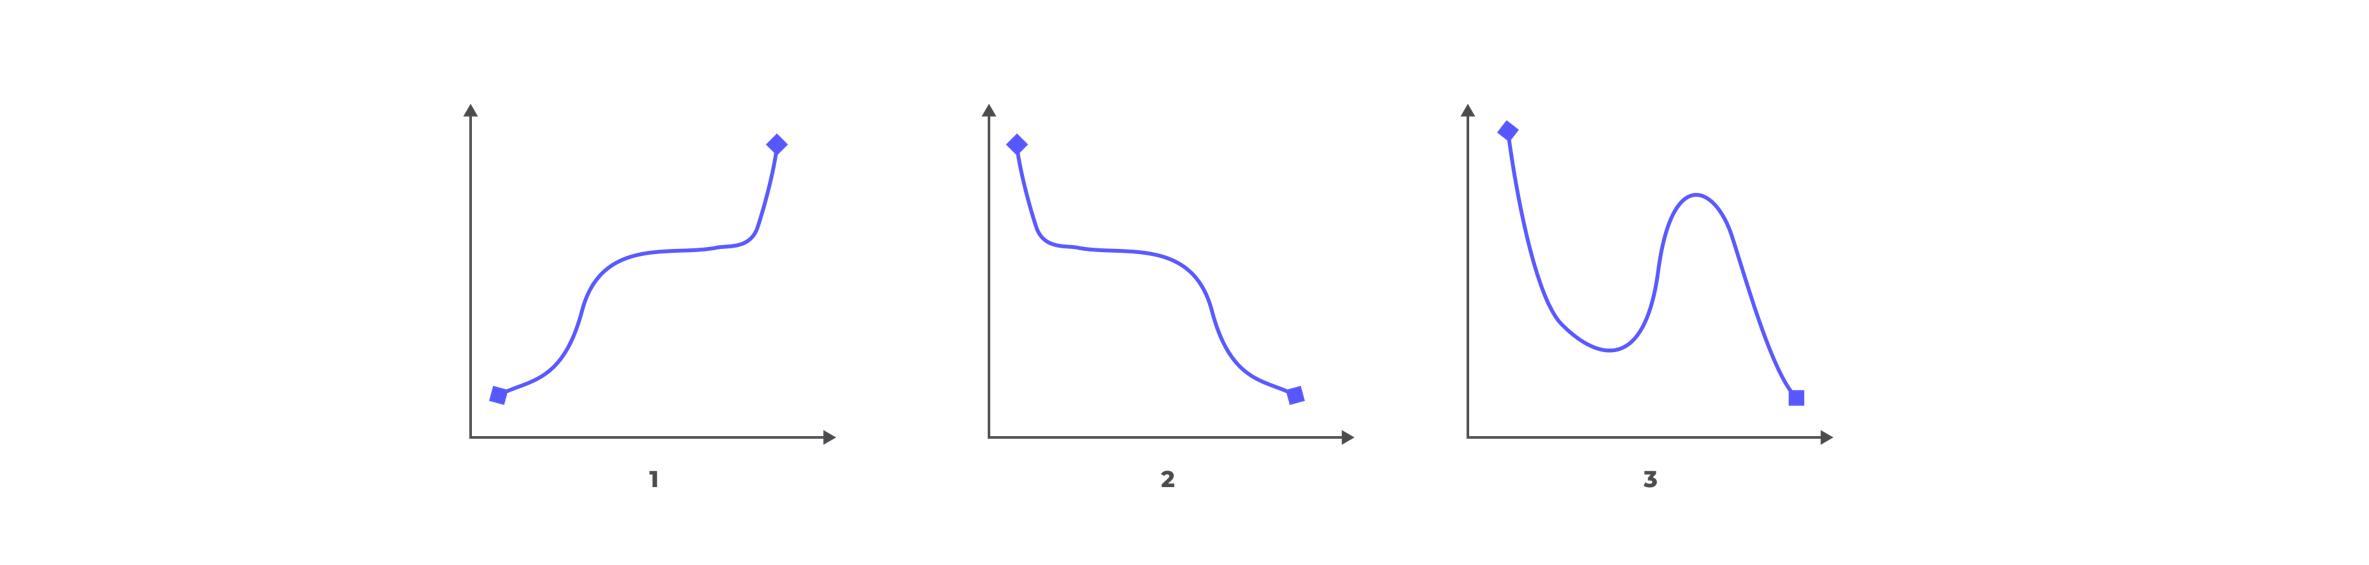

* 1 - There is a monotonic relationship, since generally when X increases, so do Y.
* 2 - There is a monotonic relationship, since generally when X increases, Y decreases.
* 3 - There is **no** monotonic relationship, since there are intervals where X increases and so does Y, and the opposite.

---

Let's consider again the mpg dataset from Seaborn. It holds records for mpg (miles per gallon), cylinders, horsepower, and weight from multiple car types.

df = sns.load_dataset('mpg')
df = df.head(50)
print(df.shape)
df.head()

We use [.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) from Pandas library. The argument is `method='spearman'`.
* Reminder: it considers numerical variables only
* Again, the data in this format is not very informative. We need to plot it to make sense.



df_corr_spearman = df.corr(method='spearman')
df_corr_spearman

We use our previous heatmap function with a threshold for a very strong monotonic correlation.
* At first, it looks similar to the previous study. But looking closer, we notice that cylinders and horsepower are monotonically correlated with mpg.
  * These variables didn't appear in the previous exercise.

heatmap_corr(data= df_corr_spearman, threshold=0.8)

We already plotted mpg against weight and displacement, so we will save time here. We will plot with `sns.scatterplot()` using cylinders and horsepower
* We note there is a pattern between mpg and horsepower, where one increases and the other decreases. The monotonic correlation between them is very strong. 
* We note cylinders is in fact a categorical variable, so we will plot again using a boxplot.

for col in ['horsepower', 'cylinders']:
  sns.scatterplot(data=df,  x=col, y='mpg')
  plt.show()
  print("\n")

We plot a swarmplot with Seaborn, where x is cylinders and y is mpg.
* We notice patterns, like the data is predominant on 4, 6 and 8 cylinders, and the majority of the levels across these cylinders look to be different.

* Note: swarmplot works fine in this dataset since the data size is small. In big datasets, a swarmplot would make the dots cluttered. So it is a matter of trial and error. Instead of swarmplot you could try histogram colored by mpg, or boxplot.



sns.swarmplot(data=df, x='cylinders', y='mpg', dodge=True)
plt.show()

---